Text(0, 0.5, 'Percentage of People Vaccinated')

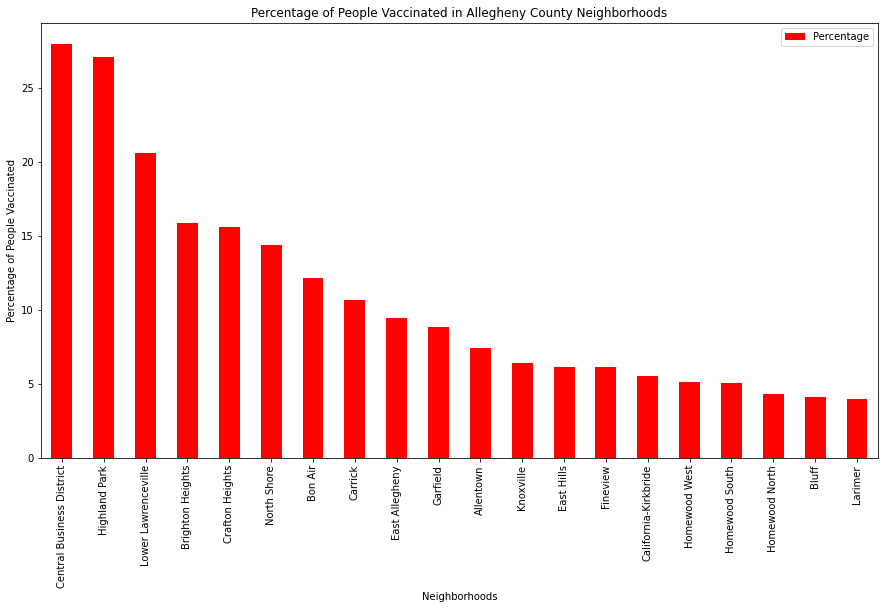

In [4]:
#run 1st code block, then 2nd code block, then 2nd code block again, then 3rd code block
import pandas as pd
import matplotlib.pyplot as plt

covid = pd.read_csv('Covid19Vaccinations.csv')
pop = pd.read_csv('Population.csv')

#Remove "(Pittsburgh)" from names of neighborhoods in neighborhood_municipality
covid['neighborhood_municipality'] = covid['neighborhood_municipality'].str.replace(r'\(Pittsburgh\)', '', regex=True).str.strip()

#Determine which columns of data are to be used
df_pop = pop[['Community','pop_total']]
df_covid = covid[['neighborhood_municipality','bivalent_booster']]

#Rename "neighborhood_municipality" to "Community"
df_covid = df_covid.rename(columns = {'neighborhood_municipality':'Community'})

#Merge the "neighborhood_municipality", "bivalent_booster", "Community", and "pop_total" into variable merge_data
merge_data = pd.merge(df_covid, df_pop, how = 'left', on = 'Community')

#Only gather data for select neighborhoods
query_mask = merge_data['Community'].str.contains('East Hills|Knoxville|East Allegheny|Homewood North|Lower Lawrenceville|Crafton Heights|Fineview|California-Kirkbride|Homewood West|Allentown|Homewood South|Larimer|Bluff|Central Business District|North Shore|Carrick|Highland Park|Bon Air|Brighton Heights|Garfield')
merge_df = merge_data[query_mask]

merge_df = merge_df.copy()

#Find percentage of people vaccinated per neighborhood
merge_df['bivalent_booster'] = merge_df['bivalent_booster'].astype(float)
merge_df['pop_total'] = merge_df['pop_total'].str.replace(r',', '', regex=True).str.strip().astype(float)
merge_df['Percentage'] = (merge_df['bivalent_booster'] / merge_df['pop_total']) * 100

#Sort percentages in ascending order
merge_df_sorted = merge_df.sort_values(by = 'Percentage', ascending=[False])

#Graph the percetnage of people vaccinated per neighborhood
merge_df_sorted.plot(kind ='bar', x ='Community', y ='Percentage', use_index = True, figsize = (15, 8), color = 'red')
plt.title("Percentage of People Vaccinated in Allegheny County Neighborhoods")
plt.xlabel("Neighborhoods")
plt.ylabel("Percentage of People Vaccinated")

In [6]:
merge_df_sorted.head(20)

,Community,bivalent_booster,pop_total,Percentage
44,Central Business District,902.0,3220.0,28.012422
189,Highland Park,2307.0,8514.0,27.096547
176,Lower Lawrenceville,709.0,3439.0,20.616458
70,Brighton Heights,1440.0,9083.0,15.853793
166,Crafton Heights,670.0,4294.0,15.603167
17,North Shore,61.0,424.0,14.386792
194,Bon Air,139.0,1144.0,12.150350
42,Carrick,1405.0,13167.0,10.670616
161,East Allegheny,425.0,4505.0,9.433962
5,Garfield,747.0,8462.0,8.827700


In [11]:
print('Average Percentage:', merge_df_sorted['Percentage'].mean())

Average Percentage: 10.8452559917212


# Conclusion

Out of the 20 Pittsburgh neighborhoods my group and I decided to analyze, the data shows that the average percentage of a neighborhood's population that is fully vaccinated with a booster is 10.8%. The Central Business District has the highest percentage of its population fully vaccinated with a percentage of 28%, and in a close second is Highland Park with 27% of their population fully vaccinated. On the contrary, Larimer has the lowest percentage, with only 3.9% of their population fully vaccinated. Bluff and Homewood North also have a low percentage of their population fully vaccinated, with both neighborhoods maintaining a percentage slightly above 4%.     
With this data, it can be concluded that the Central Business District is the safest neighborhood and thus, the best neighborhood in Pittsburgh. I personally agree that the Central Business District is the best neighborhood in Pittsburgh, as the area appears to have a lot of shopping, entertainment, apartments, and is overall, a very safe neighborhood.